In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import numpy as np

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
# Load dataset
car_dataset = pd.read_csv('/content/car data.csv')  # Use correct file path

# Inspect the first 5 rows of the dataset
car_dataset.head()

# Check the shape of the dataset
car_dataset.shape

# Get general information about the dataset
car_dataset.info()

# Check for missing values
missing_values = car_dataset.isnull().sum()
print("Missing values in each column:\n", missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
Missing values in each column:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


 Data Validation and Visualization

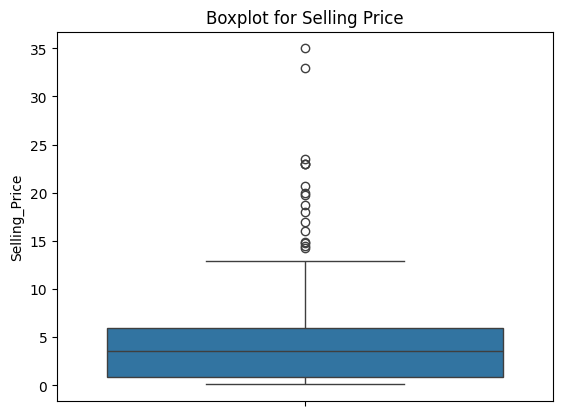

In [ ]:
# Data Validation: Check if Selling Price or Year columns contain any invalid values
if (car_dataset['Selling_Price'] < 0).any():
    print("Error: Negative values found in 'Selling_Price'")
if (car_dataset['Year'] > 2024).any():
    print("Error: Invalid future 'Year' found in the dataset")

# Check for outliers using a simple boxplot
sns.boxplot(car_dataset['Selling_Price'])
plt.title("Boxplot for Selling Price")
plt.show()

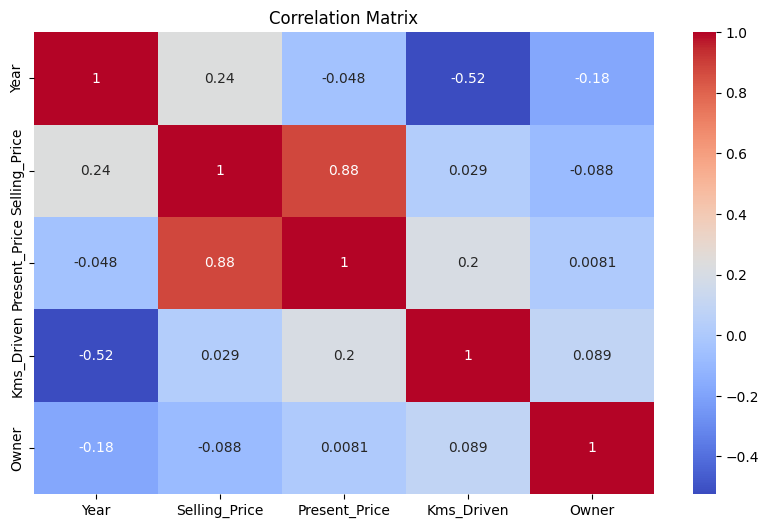

In [ ]:
# Check correlation between features
# Exclude non-numerical columns like 'Car_Name' before calculating correlation
numerical_features = car_dataset.select_dtypes(include=np.number)  # Select only numerical columns
corr_matrix = numerical_features.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Encoding Categorical Variables

In [ ]:
# Encoding categorical variables
# Encoding "Fuel_Type"
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}}, inplace=True)

# Encoding "Seller_Type"
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}}, inplace=True)

# Encoding "Transmission"
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}}, inplace=True)

<ipython-input-5-08873c6923b4>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}}, inplace=True)
<ipython-input-5-08873c6923b4>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}}, inplace=True)
<ipython-input-5-08873c6923b4>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`

Feature Scaling

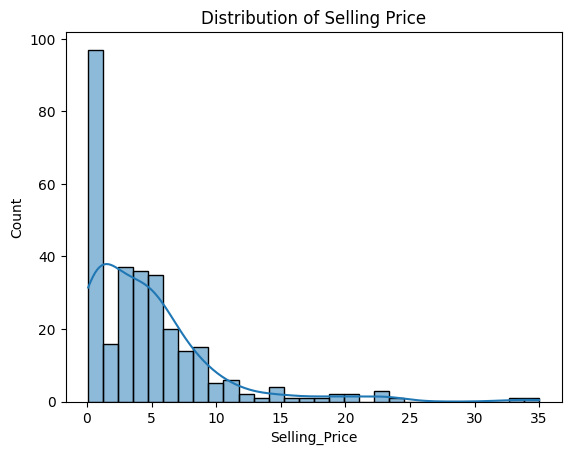

In [ ]:
# Define features (X) and target variable (Y)
X = car_dataset.drop(['Car_Name','Selling_Price'], axis=1)
Y = car_dataset['Selling_Price']

# Check the distribution of Y (target)
sns.histplot(Y, bins=30, kde=True)
plt.title("Distribution of Selling Price")
plt.show()

# Feature Scaling: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Data Splitting

In [ ]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=2)

Linear Regression Model

In [ ]:
# Linear Regression Model
lin_reg_model = LinearRegression()

# Cross-validation for model validation (5-fold)
cv_scores = cross_val_score(lin_reg_model, X_train, Y_train, cv=5)
print("Cross-Validation Scores (Linear Regression):", cv_scores)
print("Mean CV Score (Linear Regression):", np.mean(cv_scores))

# Train the Linear Regression model
lin_reg_model.fit(X_train, Y_train)

# Predictions on Training data
training_data_prediction = lin_reg_model.predict(X_train)

# R-squared Error for Training data
r2_error_train = metrics.r2_score(Y_train, training_data_prediction)
mae_train = metrics.mean_absolute_error(Y_train, training_data_prediction)
rmse_train = np.sqrt(metrics.mean_squared_error(Y_train, training_data_prediction))

print("Linear Regression - Training Data:")
print(f"R-squared: {r2_error_train}")
print(f"MAE: {mae_train}")
print(f"RMSE: {rmse_train}")

Cross-Validation Scores (Linear Regression): [0.77797672 0.86773094 0.89937591 0.78104989 0.85625465]
Mean CV Score (Linear Regression): 0.8364776220506425
Linear Regression - Training Data:
R-squared: 0.8838169193709795
MAE: 1.1998520242143471
RMSE: 1.7909012678408909


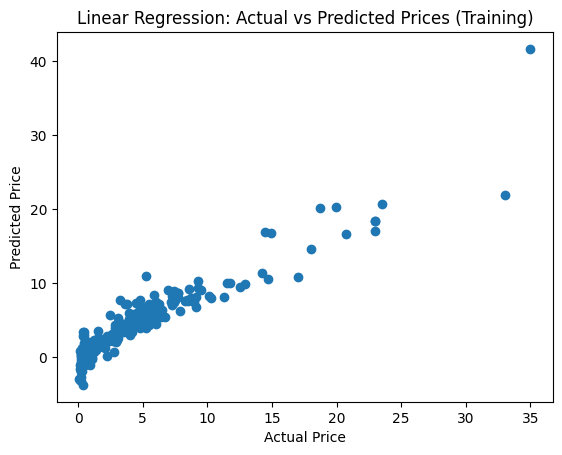

In [ ]:
# Plot Actual vs Predicted for Training data
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted Prices (Training)")
plt.show()

# Predictions on Test data
test_data_prediction = lin_reg_model.predict(X_test)

# R-squared Error for Test data
r2_error_test = metrics.r2_score(Y_test, test_data_prediction)
mae_test = metrics.mean_absolute_error(Y_test, test_data_prediction)
rmse_test = np.sqrt(metrics.mean_squared_error(Y_test, test_data_prediction))

Linear Regression - Test Data:
R-squared: 0.8401532365378387
MAE: 1.267199847291106
RMSE: 1.7134244742419706


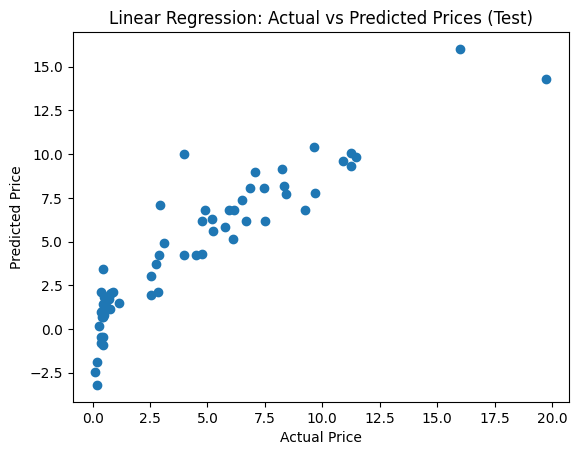

In [ ]:
# R-squared Error for Test data
r2_error_test = metrics.r2_score(Y_test, test_data_prediction)
mae_test = metrics.mean_absolute_error(Y_test, test_data_prediction)
rmse_test = np.sqrt(metrics.mean_squared_error(Y_test, test_data_prediction))

print("Linear Regression - Test Data:")
print(f"R-squared: {r2_error_test}")
print(f"MAE: {mae_test}")
print(f"RMSE: {rmse_test}")

# Plot Actual vs Predicted for Test data
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted Prices (Test)")
plt.show()

Lasso Regression Model

In [ ]:
# Lasso Regression Model
lass_reg_model = Lasso()

# Cross-validation for Lasso model (5-fold)
cv_scores_lasso = cross_val_score(lass_reg_model, X_train, Y_train, cv=5)
print("Cross-Validation Scores (Lasso):", cv_scores_lasso)
print("Mean CV Score (Lasso):", np.mean(cv_scores_lasso))

# Train the Lasso Regression model
lass_reg_model.fit(X_train, Y_train)

# Predictions on Training data (Lasso)
training_data_prediction_lasso = lass_reg_model.predict(X_train)

# R-squared Error for Training data (Lasso)
r2_error_train_lasso = metrics.r2_score(Y_train, training_data_prediction_lasso)
mae_train_lasso = metrics.mean_absolute_error(Y_train, training_data_prediction_lasso)
rmse_train_lasso = np.sqrt(metrics.mean_squared_error(Y_train, training_data_prediction_lasso))

print("Lasso Regression - Training Data:")
print(f"R-squared: {r2_error_train_lasso}")
print(f"MAE: {mae_train_lasso}")
print(f"RMSE: {rmse_train_lasso}")



# Predictions on Test data (Lasso)
test_data_prediction_lasso = lass_reg_model.predict(X_test)

# R-squared Error for Test data (Lasso)
r2_error_test_lasso = metrics.r2_score(Y_test, test_data_prediction_lasso)
mae_test_lasso = metrics.mean_absolute_error(Y_test, test_data_prediction_lasso)
rmse_test_lasso = np.sqrt(metrics.mean_squared_error(Y_test, test_data_prediction_lasso))

print("Lasso Regression - Test Data:")
print(f"R-squared: {r2_error_test_lasso}")
print(f"MAE: {mae_test_lasso}")
print(f"RMSE: {rmse_test_lasso}")




Cross-Validation Scores (Lasso): [0.61709398 0.79728253 0.79097388 0.8896609  0.7095956 ]
Mean CV Score (Lasso): 0.7609213767020204
Lasso Regression - Training Data:
R-squared: 0.7854721652221893
MAE: 1.5932817413271942
RMSE: 2.433559811866322
Lasso Regression - Test Data:
R-squared: 0.7759356152964502
MAE: 1.49360710368154
RMSE: 2.028614183334873


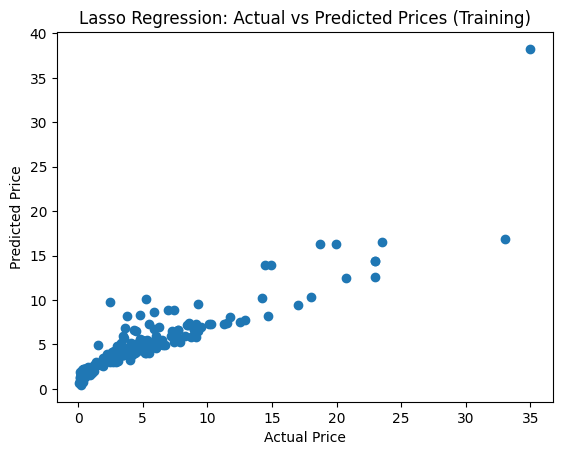

In [ ]:
# Plot Actual vs Predicted for Training data (Lasso)
plt.scatter(Y_train, training_data_prediction_lasso)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Lasso Regression: Actual vs Predicted Prices (Training)")
plt.show()

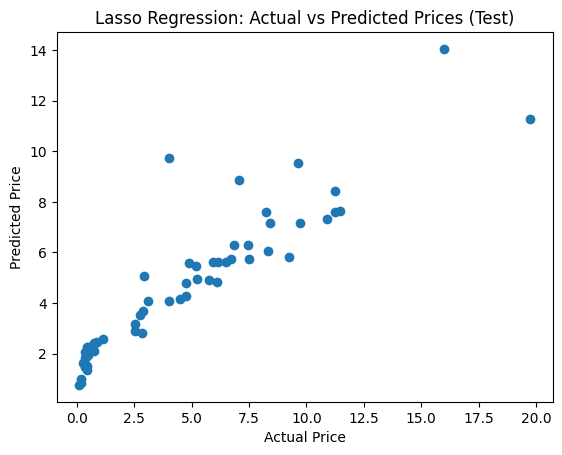

In [ ]:
# Plot Actual vs Predicted for Test data (Lasso)
plt.scatter(Y_test, test_data_prediction_lasso)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Lasso Regression: Actual vs Predicted Prices (Test)")
plt.show()

Feature Importance

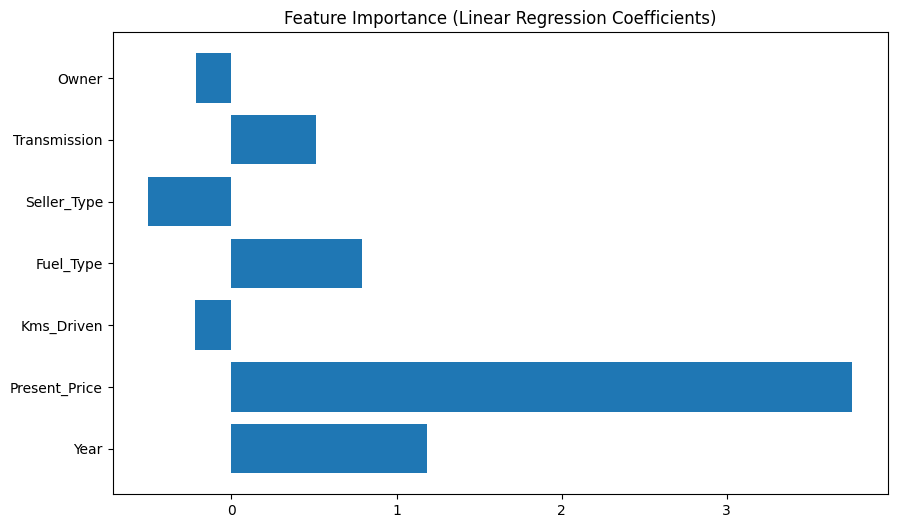

In [ ]:
# Feature Importance (for Linear Regression) using coefficients
coefficients = lin_reg_model.coef_
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, coefficients)
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(301, 7) (240, 7) (61, 7)


Training the Model

In [ ]:
# Import the necessary module
from sklearn import svm

# Now you can create the classifier
classifier = svm.SVC(kernel='linear')

In [ ]:
# Import the necessary module for Support Vector Regression
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, r2_score  # Import r2_score for regression

# Create a Support Vector Regression model
regressor = SVR(kernel='linear')

# Train the regressor using your training data
regressor.fit(X_train, Y_train)

# Make predictions on the training data
Y_train_pred = regressor.predict(X_train)



In [ ]:
# Evaluate the model using a suitable metric for regression (e.g., R-squared)
r2 = r2_score(Y_train, Y_train_pred)
print(f"R-squared on training data: {r2}")

R-squared on training data: 0.8691480519933548


In [ ]:
# Import the necessary module for Support Vector Regression
# from sklearn.svm import SVR
# from sklearn.metrics import accuracy_score  # Import accuracy_score

# Create a Support Vector Regression model
# regressor = SVR(kernel='linear')

# Train the regressor using your training data
# regressor.fit(X_train, Y_train)

# Fit the classifier to your training data
# classifier.fit(X_train, Y_train)  # This line is crucial

# accuracy score on the training data
# X_train_prediction = classifier.predict(X_train)
# training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

Model Evaluation

Accuracy Score

In [ ]:
# accuracy score on the training data
# X_train_prediction = classifier.predict(X_train)
# training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

################################################################################

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# ... (Your code to load and prepare data) ...

# Create an SVC classifier with a non-linear kernel (e.g., 'rbf')
classifier = SVC(kernel='rbf')  # Change the kernel to 'rbf' or other non-linear kernels

# Fit the classifier to your training data
classifier.fit(X_train, Y_train)

# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
# Assuming X_train and Y_train are your training data and labels
from sklearn.svm import SVC
# ... (other imports)

# If classifier is not already initialized or trained:
classifier = SVC(kernel='linear')
# classifier.fit(X_train, Y_train)  # Make sure to train the model

# ... (rest of your code)

input_data = (5,166,72,19,175,25.8,0.587) # Remove the extra feature (51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data) # Now this line should work
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[-695.81019287   18.3518213    -0.94984761   44.19587548  365.64486387
    75.61243287    2.19719042]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# Assuming X_train and Y_train are your training data and labels
from sklearn.svm import SVC
# ... (other imports)

# If classifier is not already initialized or trained:
classifier = SVC(kernel='linear')
classifier.fit(X_train, Y_train)  # Train the model before predicting

# ... (rest of your code)

input_data = (5,166,72,19,175,25.8,0.587) # Remove the extra feature (51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data) # Now this line should work
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.